#Imports and Loading in the Data

In [0]:
!pip install pymysql

     |████████████████████████████████| 51kB 3.4MB/s 


In [0]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
#establishing connection to MYSQL to pull data
conn_loans = pymysql.connect(host='learning-1000ml.c0zbrffehjje.us-east-2.rds.amazonaws.com', 
                       port=3306, 
                       user='root1000ml', 
                       passwd='IheartData', 
                       db = 'financial')

In [0]:
#creating pandas dataframe
df = pd.read_sql('select * from financial.trans as t inner join financial.loan as l on  t.account_id = l.account_id inner join financial.order as o on l.account_id = o.account_id inner join financial.account as a on l.account_id = a.account_id inner join financial.disp as d on l.account_id = d.account_id left join financial.card as c on d.disp_id = c.disp_id inner join financial.client as cl on d.client_id = cl.client_id inner join financial.district as dt on cl.district_id = dt.district_id',conn_loans)

In [0]:
df.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account', 'loan_id', 'account_id',
       'date', 'amount', 'duration', 'payments', 'status', 'order_id',
       'account_id', 'bank_to', 'account_to', 'amount', 'k_symbol',
       'account_id', 'district_id', 'frequency', 'date', 'disp_id',
       'client_id', 'account_id', 'type', 'card_id', 'disp_id', 'type',
       'issued', 'client_id', 'gender', 'birth_date', 'district_id',
       'district_id', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [0]:
#locating duplicates
df = df.loc[:,~df.columns.duplicated()]

In [0]:
df.groupby(['loan_id']).count()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account,account_id,date,amount,duration,payments,status,order_id,account_id,bank_to,account_to,amount,k_symbol,account_id,district_id,frequency,date,disp_id,client_id,account_id,type,card_id,disp_id,type,issued,client_id,gender,birth_date,district_id,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4959,1912,1912,1912,1912,1632,1912,1912,896,636,804,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,0,0,0,0,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912
4961,303,303,303,303,213,303,303,178,53,117,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,0,0,0,0,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303
4962,1096,1096,1096,1096,984,1096,1096,588,372,432,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,0,0,0,0,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
4967,520,520,520,520,452,520,520,296,172,220,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,0,0,0,0,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
4968,520,520,520,520,452,520,520,296,248,268,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,0,0,0,0,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
4973,1146,1146,1146,1146,996,1146,1146,633,498,564,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,0,0,0,0,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
4986,2740,2740,2740,2740,2420,2740,2740,1800,1210,1410,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,1370,1370,1370,1370,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740,2740
4988,185,185,185,185,139,185,185,85,11,20,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,0,0,0,0,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
4989,59,59,59,59,43,59,59,24,1,7,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [0]:
#looking at NaN values
df.isna().sum()

trans_id            0
account_id          0
date                0
type                0
operation       83955
amount              0
balance             0
k_symbol       244748
bank           372505
account        340608
loan_id             0
account_id          0
date                0
amount              0
duration            0
payments            0
status              0
order_id            0
account_id          0
bank_to             0
account_to          0
amount              0
k_symbol            0
account_id          0
district_id         0
frequency           0
date                0
disp_id             0
client_id           0
account_id          0
type                0
card_id        447113
disp_id        447113
type           447113
issued         447113
client_id           0
gender              0
birth_date          0
district_id         0
district_id         0
A2                  0
A3                  0
A4                  0
A5                  0
A6                  0
A7        

In [0]:
#alternate dataframe
df2 = pd.read_sql('select * from financial.loan as l  inner join financial.account as a on l.account_id = a.account_id inner join financial.disp as d on l.account_id = d.account_id left join financial.card as c on d.disp_id = c.disp_id inner join financial.client as cl on d.client_id = cl.client_id inner join financial.district as dt on cl.district_id = dt.district_id',conn_loans)

In [0]:
df2.columns

Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status', 'account_id', 'district_id', 'frequency', 'date', 'disp_id',
       'client_id', 'account_id', 'type', 'card_id', 'disp_id', 'type',
       'issued', 'client_id', 'gender', 'birth_date', 'district_id',
       'district_id', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [0]:
#re-ordering columns
df2.columns = ['loan_id', 'loan_account_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'account_account_id', 'district_id', 'frequency', 'account_date', 'disp_disp_id',
       'disp_client_id', 'disp_account_id', 'type', 'card_id', 'card_disp_id','type',
       'issued', 'client_client_id', 'gender', 'birth_date', 'client_district_id',
       'district_district_id', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

In [0]:
#deleting unnecessary columns
del df2['account_account_id']
del df2['disp_client_id']
del df2['disp_account_id']
del df2['card_disp_id']
del df2['client_district_id']
del df2['district_district_id']


In [0]:
#assigning Good and Bad Loans Statuses as 1 or 0
df2.loc[(df2['status'] == 'A') | (df2['status'] == 'C'),'status'] = 1
df2.loc[(df2['status'] == 'B') | (df2['status'] == 'D'),'status'] = 0

In [0]:
#assigning Good and Bad Loans Statuses as 1 or 0 and Genders as 1 or 0
df2.loc[(df2['status'] == 'A') | (df2['status'] == 'C'),'status'] = 1
df2.loc[(df2['status'] == 'B') | (df2['status'] == 'D'),'status'] = 0
df2.loc[(df2['gender'] == 'M'),'gender'] = 1
df2.loc[(df2['gender'] == 'F'),'gender'] = 0

In [0]:
df2.loc[(df2['card_id'] == 'NaN') | (df2['card_id'] == 'None'),'creditcardyes'] = 0


In [0]:
df2['card_type'].unique()

array([None, 'classic', 'gold', 'junior'], dtype=object)

In [0]:
df2['card_id'].unique()

array([  nan,   16.,   17.,   21.,   25.,   45.,   53.,   60.,   65.,
        119.,  140.,  142.,  151.,  159.,  164.,  170.,  186.,  189.,
        196.,  280.,  304.,  322.,  337.,  352.,  353.,  355.,  357.,
        378.,  389.,  394.,  398.,  408.,  413.,  414.,  418.,  426.,
        428.,  434.,  436.,  446.,  511.,  517.,  538.,  551.,  552.,
        565.,  566.,  569.,  577.,  587.,  600.,  612.,  623.,  680.,
        750.,  769.,  770.,  773.,  775.,  780.,  781.,  782.,  783.,
        785.,  791.,  792.,  795.,  796.,  801.,  803.,  813.,  814.,
        819.,  820.,  823.,  824.,  829.,  831.,  833.,  834.,  844.,
        847.,  854.,  855.,  857.,  874.,  880.,  882.,  884.,  886.,
        890.,  891.,  896.,  897.,  904.,  906.,  918.,  923.,  924.,
        933.,  936.,  946.,  947.,  951.,  956.,  957.,  965.,  989.,
        991., 1001., 1002., 1003., 1005., 1007., 1009., 1010., 1014.,
       1016., 1022., 1023., 1024., 1025., 1035., 1036., 1038., 1040.,
       1043., 1055.,

In [0]:
frequency_dict = {'POPLATEK MESICNE':'MONTHLY','POPLATEK TYDNE':'WEEKLY','POPLATEK PO OBRATU':'TRANS'}

In [0]:
#converting frequencies column to english by mapping through a dictionary
frequency_dict = {'POPLATEK MESICNE':'MONTHLY','POPLATEK TYDNE':'WEEKLY','POPLATEK PO OBRATU':'TRANS'}
df2['frequency'] = df2['frequency'].map(frequency_dict)

In [0]:
df2['frequency'].unique()

array(['POPLATEK MESICNE', 'POPLATEK TYDNE', 'POPLATEK PO OBRATU'],
      dtype=object)

In [0]:
#assigning values to disponent types
df2.loc[(df2['disp_type'] == 'OWNER'),'disp_type'] = 1
df2.loc[(df2['disp_type'] == 'DISPONENT'),'disp_type'] = 0

In [0]:
df2['gender'].value_counts()

0    417
1    410
Name: gender, dtype: int64

In [0]:
df2[['gender','status']].groupby(['gender']).sum()

,status
gender,
0,376
1,375


In [0]:
df2['status'].value_counts()

1    751
0     76
Name: status, dtype: int64

In [0]:
df2[['district_id','status']].groupby(['district_id']).count()

,status
district_id,
1,104
2,7
3,7
4,7
5,11
6,10
7,7
8,5
9,12


In [0]:
df2.isnull().sum()

loan_id               0
loan_account_id       0
loan_date             0
amount                0
duration              0
payments              0
status                0
district_id           0
frequency             0
account_date          0
disp_disp_id          0
type                  0
card_id             657
type                657
issued              657
client_client_id      0
gender                0
birth_date            0
A2                    0
A3                    0
A4                    0
A5                    0
A6                    0
A7                    0
A8                    0
A9                    0
A10                   0
A11                   0
A12                   9
A13                   0
A14                   0
A15                   9
A16                   0
dtype: int64

In [0]:
sortdf = df2.groupby(['loan_id']).count()

In [0]:
sortdf

,account_id,date,amount,duration,payments,status,account_id,district_id,frequency,date,disp_id,client_id,account_id,type,card_id,disp_id,type,issued,client_id,gender,birth_date,district_id,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4959,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4961,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4962,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4967,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4968,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4973,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4986,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4988,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4989,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
sortdf['status'].value_counts()

1    537
2    145
Name: status, dtype: int64

##Cleaning and Pre-processing

In [0]:
#3rd iteration of dataframe
df3 = pd.read_sql('select * from financial.trans as t inner join financial.loan as l on  t.account_id = l.account_id inner join financial.account as a on l.account_id = a.account_id inner join financial.disp as d on l.account_id = d.account_id left join financial.card as c on d.disp_id = c.disp_id inner join financial.client as cl on d.client_id = cl.client_id inner join financial.district as dt on a.district_id = dt.district_id',conn_loans)

In [0]:
df3.shape

(233627, 49)

In [0]:
df3.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account', 'loan_id', 'account_id',
       'date', 'amount', 'duration', 'payments', 'status', 'account_id',
       'district_id', 'frequency', 'date', 'disp_id', 'client_id',
       'account_id', 'type', 'card_id', 'disp_id', 'type', 'issued',
       'client_id', 'gender', 'birth_date', 'district_id', 'district_id', 'A2',
       'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
       'A14', 'A15', 'A16'],
      dtype='object')

In [0]:
#re-ordering
df3.columns = ['trans_id', 'trans_account_id', 'trans_date', 'type', 'operation', 'trans_amount',
       'balance', 'k_symbol', 'bank', 'account', 'loan_id', 'loan_account_id',
       'loan_date', 'loan_amount', 'duration', 'payments', 'status', 'account_account_id',
       'account_district_id', 'frequency', 'account_date', 'disp_disp_id', 'disp_client_id',
       'disp_account_id', 'disp_type', 'card_id', 'card_disp_id', 'card_type', 'issued',
       'client_client_id', 'gender', 'birth_date', 'client_district_id', 'district_id', 'A2',
       'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
       'A14', 'A15', 'A16']

In [0]:
#df3.groupby(['loan_id']).count()

In [0]:
#getting rid of unneeded features
del df3['trans_account_id']
del df3['account']
del df3['bank']
del df3['loan_account_id']
del df3['disp_client_id']
del df3['disp_account_id']
del df3['card_disp_id']
del df3['client_district_id']
del df3['account_district_id']

In [0]:
df3.shape

(233627, 40)

In [0]:
#giving disponent types values
df3.loc[(df3['disp_type'] == 'OWNER'),'disp_type'] = 1
df3.loc[(df3['disp_type'] == 'DISPONENT'),'disp_type'] = 0

In [0]:
#converting frequencies coumn to english
frequency_dict = {'POPLATEK MESICNE':'MONTHLY','POPLATEK TYDNE':'WEEKLY','POPLATEK PO OBRATU':'TRANS'}
df3['frequency'] = df3['frequency'].map(frequency_dict)

In [0]:
#assigning loan statuses and genders to 1 or 0
df3.loc[(df3['status'] == 'A') | (df3['status'] == 'C'),'status2'] = 1
df3.loc[(df3['status'] == 'B') | (df3['status'] == 'D'),'status2'] = 0
df3.loc[(df3['gender'] == 'M'),'gender'] = 1
df3.loc[(df3['gender'] == 'F'),'gender'] = 0

In [0]:
df3['type'].unique()

array(['PRIJEM', 'VYDAJ', 'VYBER'], dtype=object)

In [0]:
trans_type_dict = {'PRIJEM':'credit','VYDAJ':'withdrawal','VYBER':'cashwithdrawal'}

In [0]:
df3['operation'].unique()

array(['VKLAD', 'PREVOD Z UCTU', 'VYBER', 'PREVOD NA UCET', None,
       'VYBER KARTOU'], dtype=object)

In [0]:
#converting transaction operation column to english
trans_operation_dict = {'VKLAD':'creditincash','PREVOD Z UCTU':'fromabank','VYBER':'cashwithdrawal','PREVOD NA UCET':'toabank','None':'None','VYBER KARTOU':'creditwithdrawal'}

In [0]:
df3['operation'] = df3['operation'].map(trans_operation_dict)

In [0]:
df3['type'] = df3['type'].map(trans_type_dict)

In [0]:

df3['k_symbol'].unique()

array([None, 'UVER', 'SIPO', 'SLUZBY', 'UROK', 'SANKC. UROK', ' ',
       'POJISTNE'], dtype=object)

In [0]:
#converting k_symbol column to english
k_symbol_dict = {'None':'None','UVER':'loan','SIPO':'household','SLUZBY':'statement','UROK':'interestcredited','SANKC. UROK':'sancintnegbalance','POJISTNE':'insurance'}

In [0]:
df3['k_symbol'] = df3['k_symbol'].map(k_symbol_dict)

In [0]:
df3['k_symbol'].unique()

array([nan, 'loan', 'household', 'statement', 'interestcredited',
       'sancintnegbalance', 'insurance'], dtype=object)

In [0]:
df3.isna().sum()

trans_id                   0
trans_date                 0
type                       0
operation              38146
trans_amount               0
balance                    0
k_symbol              124333
loan_id                    0
loan_date                  0
loan_amount                0
duration                   0
payments                   0
status                     0
account_account_id         0
frequency                  0
account_date               0
disp_disp_id               0
disp_type                  0
card_id               186500
card_type             186500
issued                186500
client_client_id           0
gender                     0
birth_date                 0
district_id                0
A2                         0
A3                         0
A4                         0
A5                         0
A6                         0
A7                         0
A8                         0
A9                         0
A10                        0
A11           

In [0]:
df3['card_type'].unique()

array([None, 'classic', 'gold', 'junior'], dtype=object)

In [0]:
#converting loan date to datetime format
df3['loan_date'] = pd.to_datetime(df3['loan_date'],exact = False)

In [0]:
#converting birth date to datetime format
df3['birth_date'] = pd.to_datetime(df3['birth_date'],exact = False)

In [0]:
df3.groupby(['loan_id']).count()

,trans_id,trans_date,type,operation,trans_amount,balance,k_symbol,loan_date,loan_amount,duration,payments,status,account_account_id,frequency,account_date,disp_disp_id,disp_type,card_id,card_type,issued,client_client_id,gender,birth_date,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,LoanAge
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4959,956,956,956,816,956,956,448,956,956,956,956,956,956,956,956,956,956,0,0,0,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956,956
4961,303,303,303,213,303,303,178,303,303,303,303,303,303,303,303,303,303,0,0,0,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303
4962,274,274,274,246,274,274,120,274,274,274,274,274,274,274,274,274,274,0,0,0,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274
4967,130,130,130,113,130,130,60,130,130,130,130,130,130,130,130,130,130,0,0,0,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4968,130,130,130,113,130,130,61,130,130,130,130,130,130,130,130,130,130,0,0,0,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4973,382,382,382,332,382,382,165,382,382,382,382,382,382,382,382,382,382,0,0,0,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
4986,548,548,548,484,548,548,250,548,548,548,548,548,548,548,548,548,548,274,274,274,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548
4988,185,185,185,139,185,185,85,185,185,185,185,185,185,185,185,185,185,0,0,0,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
4989,59,59,59,43,59,59,24,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59


In [0]:
import datetime

In [0]:
#calculating age of the loan
df3['LoanAge'] = (df3['loan_date'].dt.year - df3['birth_date'].dt.year)

In [0]:
df3.columns

Index(['trans_id', 'trans_date', 'type', 'operation', 'trans_amount',
       'balance', 'k_symbol', 'loan_id', 'loan_date', 'loan_amount',
       'duration', 'payments', 'status', 'account_account_id', 'frequency',
       'account_date', 'disp_disp_id', 'disp_type', 'card_id', 'card_type',
       'issued', 'client_client_id', 'gender', 'birth_date', 'district_id',
       'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
       'A13', 'A14', 'A15', 'A16', 'LoanAge'],
      dtype='object')

In [0]:
df4 = df3[df3['disp_type'] == 1]

###Calculating amount loaned, amount repayed and amout still owed for status A

In [0]:
dfother = df4[(df4['status'] == 'A') & (df4['k_symbol'] == 'loan')].groupby(['loan_id']).sum()

In [0]:
dfother['tr']

In [0]:
df5 = df4[df4['status'] == 'A'].groupby(['loan_id']).mean()

In [0]:
df5['owed'] = dfother['trans_amount'] - df5['loan_amount']

In [0]:
df5

,trans_id,trans_amount,balance,loan_amount,duration,payments,account_account_id,disp_disp_id,disp_type,card_id,client_client_id,gender,district_id,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,status2,LoanAge,owed
loan_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4959,5.174651e+05,6593.125523,36540.780335,80952.0,24.0,3373.0,2.0,2.0,1.0,NaN,2.0,1.0,1.0,1204953.0,0.0,0.0,0.0,1.0,1.0,100.0,12541.0,0.2,0.43,167.0,85677.0,99107.0,1.0,49.0,0.0
4962,3.665176e+05,10797.649635,56279.237226,30276.0,12.0,2523.0,25.0,31.0,1.0,NaN,31.0,1.0,68.0,228848.0,15.0,40.0,18.0,2.0,6.0,57.2,9893.0,4.0,4.72,96.0,5623.0,5887.0,1.0,35.0,0.0
4973,4.798093e+05,11827.704188,56893.405759,165960.0,24.0,6915.0,67.0,78.0,1.0,NaN,78.0,0.0,16.0,93931.0,74.0,21.0,10.0,1.0,8.0,56.9,8427.0,1.1,1.54,107.0,1874.0,1913.0,1.0,52.0,0.0
4986,4.392295e+05,4486.386861,39814.627737,102876.0,12.0,8573.0,97.0,116.0,1.0,16.0,116.0,1.0,74.0,323870.0,0.0,0.0,0.0,1.0,1.0,100.0,10673.0,4.7,5.44,100.0,18782.0,18347.0,1.0,55.0,0.0
4996,6.052769e+05,12807.853535,52603.116162,88440.0,12.0,7370.0,132.0,158.0,1.0,25.0,158.0,0.0,40.0,128118.0,9.0,16.0,6.0,3.0,8.0,85.3,9317.0,6.4,7.07,97.0,6949.0,6872.0,1.0,51.0,0.0
5002,4.234345e+05,4513.068182,37433.914336,104808.0,12.0,8734.0,173.0,210.0,1.0,NaN,210.0,1.0,66.0,125832.0,151.0,41.0,2.0,3.0,5.0,48.3,8512.0,3.5,4.12,102.0,2247.0,2103.0,1.0,55.0,0.0
5005,4.218475e+05,10550.069343,49256.138686,27456.0,12.0,2288.0,176.0,215.0,1.0,NaN,215.0,1.0,71.0,161227.0,5.0,35.0,11.0,4.0,10.0,69.7,8678.0,5.9,5.57,102.0,4980.0,4595.0,1.0,30.0,0.0
5032,5.088651e+05,8497.716904,53456.674134,123696.0,48.0,2577.0,290.0,352.0,1.0,NaN,352.0,1.0,56.0,124605.0,11.0,42.0,14.0,1.0,8.0,46.0,8772.0,4.6,4.98,126.0,2854.0,3158.0,1.0,54.0,0.0
5088,7.361447e+05,8629.078740,53438.342520,91152.0,24.0,3798.0,544.0,655.0,1.0,119.0,655.0,1.0,32.0,105058.0,32.0,19.0,7.0,2.0,10.0,81.0,9272.0,2.8,3.22,118.0,4340.0,4505.0,1.0,54.0,0.0


In [0]:
df5['loan_amount'].sum()

18603216.0

In [0]:
18603216.0 - 18602306

910.0

###Calculating amount loaned, amount repayed and amount still owed for B

In [0]:
dfB = df4[df4['status'] == 'B'].groupby(['loan_id']).mean()

In [0]:
dfB['loan_amount'].sum()

4362348.0

In [0]:
df4[(df4['status'] == 'B') & (df4['k_symbol'] == 'loan')]['trans_amount'].sum()

3350530

In [0]:
4362348.0 - 3350530

1011818.0

###Calculating amount loaned, Amount Repayed and amount still owed for C

In [0]:
dfC = df4[df4['status'] == 'C'].groupby(['loan_id']).mean()

In [0]:
dfC['loan_amount'].sum()

69078372.0

In [0]:
df4[(df4['status'] == 'C') & (df4['k_symbol'] == 'loan')]['trans_amount'].sum()

28891760

In [0]:
69078372.0 - 28891760

40186612.0

###Calculating amount loaned, amount repayed and amount still owed for D

In [0]:
dfD = df4[df4['status'] == 'D'].groupby(['loan_id']).mean()

In [0]:
dfD['loan_amount'].sum()

11217804.0

In [0]:
df4[(df4['status'] == 'D') & (df4['k_symbol'] == 'loan')]['trans_amount'].sum()

4408405

In [0]:
11217804.0 - 4408405

6809399.0

In [0]:
df4[df4['k_symbol'] == 'loan']

,trans_id,trans_date,type,operation,trans_amount,balance,k_symbol,loan_id,loan_date,loan_amount,duration,payments,status,account_account_id,frequency,account_date,disp_disp_id,disp_type,card_id,card_type,issued,client_client_id,gender,birth_date,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,status2,LoanAge
77,361,1994-01-12,withdrawal,toabank,3373,35338,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
78,362,1994-02-12,withdrawal,toabank,3373,29636,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
79,363,1994-03-12,withdrawal,toabank,3373,35827,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
80,364,1994-04-12,withdrawal,toabank,3373,40639,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
81,365,1994-05-12,withdrawal,toabank,3373,42772,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
82,366,1994-06-12,withdrawal,toabank,3373,40009,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
83,367,1994-07-12,withdrawal,toabank,3373,35317,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
84,368,1994-08-12,withdrawal,toabank,3373,40522,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
85,369,1994-09-12,withdrawal,toabank,3373,42447,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49
86,370,1994-10-12,withdrawal,toabank,3373,35328,loan,4959,1994-01-05,80952,24,3373.0,A,2,MONTHLY,1993-02-26,2,1,NaN,None,None,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,1.0,49


In [0]:
import datetime

In [0]:
df3['trans_date'] = pd.to_datetime(df3['trans_date'],exact = False)
df3['loan_date'] = pd.to_datetime(df3['loan_date'],exact = False)

In [0]:
dfbeforeloans = df3[df3['trans_date'].dt.date<=df3['loan_date'].dt.date]

In [0]:
dfmodel = dfbeforeloans[['balance', 'loan_id','loan_amount','duration', 'payments', 'status2' ,'frequency', 'disp_type', 'card_type', 'gender', 'LoanAge', 'district_id']]

###Exporting EDA dataset

In [0]:
export_csv = eda_df.to_csv(r'/content/eda_df.csv')

In [0]:
#reading exported dataset back in
eda_Df = pd.read_csv('/content/eda_df.csv')

In [0]:
eda_df = df3

In [0]:
dfmodel['card_type'].unique()

array([None, 'classic', 'gold', 'junior'], dtype=object)

In [0]:
dfmodel['frequency'].unique()

array(['MONTHLY', 'WEEKLY', 'TRANS'], dtype=object)

In [0]:
#assigning values to frequeny of payments
dfbeforeloans.loc[dfbeforeloans['frequency'] == 'MONTHLY','frequency'] = 0
dfbeforeloans.loc[dfbeforeloans['frequency'] == 'WEEKLY','frequency'] = 1
dfbeforeloans.loc[dfbeforeloans['frequency'] == 'TRANS','frequency'] = 2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
#assigning values to credit card types
dfbeforeloans.loc[dfbeforeloans['card_type'] == 'None','card_type'] = 0
dfbeforeloans.loc[dfbeforeloans['card_type'] == 'junior','card_type'] = 1
dfbeforeloans.loc[dfbeforeloans['card_type'] == 'classic','card_type'] = 2
dfbeforeloans.loc[dfbeforeloans['card_type'] == 'gold','card_type'] = 3

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
df3['district_id'].unique()

array([ 1, 21, 68, 20, 19, 16, 74, 44, 36, 40, 66, 71, 70, 38, 56, 14, 15,
       47, 42, 46, 54, 65, 72, 29,  8, 13, 32, 27, 58, 39, 69, 52,  5, 62,
       73, 37,  4,  6, 45, 11, 25, 55, 53, 34, 41, 31, 50, 28, 30, 12, 26,
       57, 64, 59, 51, 67,  9, 24,  2, 33, 18, 60,  7, 63, 10,  3, 77, 48,
       61, 17, 43, 75, 49, 76, 35, 23, 22])

In [0]:
dfmodel.columns

Index(['balance', 'loan_id', 'loan_amount', 'duration', 'payments', 'status2',
       'frequency', 'disp_type', 'card_type', 'gender', 'LoanAge',
       'district_id'],
      dtype='object')

In [0]:
X = dfbeforeloans[['balance', 'loan_id', 'loan_amount', 'duration', 'payments',
       'frequency', 'disp_type', 'card_type', 'gender', 'LoanAge',
       'district_id', 'status2']]

In [0]:
X['disp_type'].value_counts()

1    54860
0    12116
Name: disp_type, dtype: int64

In [0]:
X.loc[X['card_type'] == 'None','card_type'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [0]:
X = X.fillna(0)

In [0]:
X.columns

Index(['balance', 'loan_id', 'loan_amount', 'duration', 'payments',
       'frequency', 'disp_type', 'card_type', 'gender', 'LoanAge',
       'district_id', 'status2'],
      dtype='object')

In [0]:
X2 = X[X['disp_type'] == 1]

In [0]:
#Getting Data per Account
features = X2[['loan_id', 'loan_amount', 'duration', 'payments',
       'frequency', 'disp_type', 'card_type', 'gender', 'LoanAge',
       'district_id', 'status2']].groupby(['loan_id']).mean()

In [0]:
featuresdisp = X[['loan_id', 'loan_amount', 'duration', 'payments',
       'frequency', 'disp_type', 'card_type', 'gender', 'LoanAge',
       'district_id', 'status2']].groupby(['loan_id']).mean()

In [0]:
#Getting Transaction Data Per Account
balances = X2.groupby(['loan_id']).agg({'balance':['min','max','mean']})

In [0]:
balancesdisp = X.groupby(['loan_id']).agg({'balance':['min','max','mean']})

###Adding Transaction Mean, Max and Min onto Dataframe for each account

In [0]:
features = features.merge(balances,left_on = 'loan_id',right_on = 'loan_id')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [0]:
featuresdisp = featuresdisp.merge(balancesdisp,left_on = 'loan_id',right_on = 'loan_id')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [0]:
features.loan_amount.mean()

151410.1759530792

In [0]:
featuresbl = features

In [0]:
#features.corr()

###Exporting Model Dataset

In [0]:
export_csv = featuresbl.to_csv(r'/content/featuresbl.csv')

In [0]:
features = pd.read_csv('/content/features.csv')

#Doing some EDA on original dataframe

In [0]:
eda_df = pd.read_csv('/content/eda_df.csv')

In [0]:
eda_df.isna().sum()

Unnamed: 0                 0
trans_id                   0
trans_date                 0
type                       0
operation              38146
trans_amount               0
balance                    0
k_symbol              124333
loan_id                    0
loan_date                  0
loan_amount                0
duration                   0
payments                   0
status                     0
account_account_id         0
frequency                  0
account_date               0
disp_disp_id               0
disp_type                  0
card_id               186500
card_type             186500
issued                186500
client_client_id           0
gender                     0
birth_date                 0
district_id                0
A2                         0
A3                         0
A4                         0
A5                         0
A6                         0
A7                         0
A8                         0
A9                         0
A10           

In [0]:
behaviour_df = eda_df[(eda_df['status'] == 0) & (eda_df['k_symbol'] != 'loan')]

In [0]:
behaviour_df['account_date'] = pd.to_datetime(behaviour_df['account_date'],exact = False)
behaviour_df['loan_date'] = pd.to_datetime(behaviour_df['loan_date'],exact = False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#creating column for age of loan
behaviour_df['accounttoloan_age'] = (behaviour_df['loan_date'] - behaviour_df['account_date']).dt.days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
behaviour_df['operation'].value_counts()

cashwithdrawal      10254
creditincash         4172
toabank              1832
fromabank             470
creditwithdrawal       38
Name: operation, dtype: int64

In [0]:
behaviour_df['trans_date'] = pd.to_datetime(behaviour_df['trans_date'],exact = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
#Looking at Transaction Dates after Loan has been Issued
behaviour_df[behaviour_df['trans_date']>= behaviour_df['loan_date'] ]

,Unnamed: 0,trans_id,trans_date,type,operation,trans_amount,balance,k_symbol,loan_id,loan_date,loan_amount,duration,payments,status,account_account_id,frequency,account_date,disp_disp_id,disp_type,card_id,card_type,issued,client_client_id,gender,birth_date,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,LoanAge,accounttoloan_age
970,970,4547,1996-05-10,credit,fromabank,15139,30381,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
971,971,4548,1996-06-10,credit,fromabank,22708,39618,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
972,972,4549,1996-07-10,credit,fromabank,15139,18934,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
973,973,4550,1996-08-10,credit,fromabank,15139,21995,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
974,974,4551,1996-09-10,credit,fromabank,15139,26233,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
975,975,4552,1996-10-10,credit,fromabank,15139,37319,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
976,976,4553,1996-11-10,credit,fromabank,15139,21873,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
977,977,4554,1996-12-10,credit,fromabank,22708,42591,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
978,978,4555,1997-01-10,credit,fromabank,15139,31659,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388
979,979,4556,1997-02-10,credit,fromabank,15139,23853,NaN,4961,1996-04-29,30276,12,2523.0,0,19,MONTHLY,1995-04-07,25,1,NaN,NaN,NaN,25,0,1939-04-23,21,Tabor,south Bohemia,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,57,388


In [0]:
behaviour_df['status'].value_counts()

0    21217
Name: status, dtype: int64

In [0]:
stuff = behaviour_df[['loan_id','accounttoloan_age']].groupby(['loan_id']).mean()

In [0]:
stuff[stuff['accounttoloan_age'] <= 365].count()

accounttoloan_age    35
dtype: int64

In [0]:
eda_df.shape

(233627, 42)

(array([ 799.,    0.,    0.,    0.,  598.,    0., 1828.,    0.,  354.,
           0.,    0.,  267.,    0.,  224.,    0.,  427.,    0., 1484.,
           0.,    0.,    0.,    0.,    0.,    0.,  968.,    0.,  471.,
           0.,  444.,    0.,    0.,  855.,    0.,  528.,    0.,  705.,
           0.,  101.,    0.,    0.,    0.,    0., 1222.,    0.,    0.,
           0.,  474.,    0.,  458.,    0.,    0.,  553.,    0.,  360.,
           0.,  158.,    0.,    0.,    0.,    0.,  739.,    0.,    0.,
           0., 1385.,    0.,  533.,    0.,  232.,    0.,    0., 1204.,
           0.,  754.,    0.,  104.,    0.,  743.,    0.,    0.,  648.,
           0.,  441.,    0.,    0.,    0.,    0.,    0.,   80.,    0.,
           0., 1184.,    0.,  408.,    0.,  331.,    0.,  497.,    0.,
         199.]),
 array([16.  , 16.45, 16.9 , 17.35, 17.8 , 18.25, 18.7 , 19.15, 19.6 ,
        20.05, 20.5 , 20.95, 21.4 , 21.85, 22.3 , 22.75, 23.2 , 23.65,
        24.1 , 24.55, 25.  , 25.45, 25.9 , 26.35, 26.8 , 27.

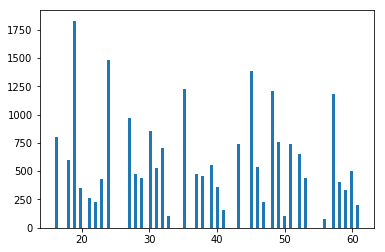

In [0]:
#Histogram of Loan Status 0 by Loan Ages
plt.hist(eda_df.loc[eda_df['status'] == 0,'LoanAge'],bins = 100)

(array([ 901.,  196.,    0.,  533.,  196.,  525.,  718.,  591.,  590.,
         926.,  189.,  502.,  260., 1241.,  355.,    0.,    0.,    0.,
           0.,  541.,    0.,  788.,    0.,  416.,    0.,    0.,  389.,
         499., 1415.,    0.,  379.,  718.,  159.,    0.,  406.,    0.,
         685.,  196.,    0.,  452.,    0.,    0.,  111.,  644.,    0.,
         584.,  185.,  622.,  660.,    0.,    0.,  539.,  471.,    0.,
         173.,    0.,  845.,    0.,    0.,  401.,    0.,    0.,    0.,
           0.,  300.,    0.,    0.,    0.,    0.,  158.,  339.,    0.,
           0.,  128.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,  101.,  638.,  168.,    0.,  598.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         329.]),
 array([ 29448.  ,  34565.52,  39683.04,  44800.56,  49918.08,  55035.6 ,
         60153.12,  65270.64,  70388.16,  75505.68,  80623.2 ,  85740.72,
         90858.24,  95975.76, 101093.28, 106210.8 , 11

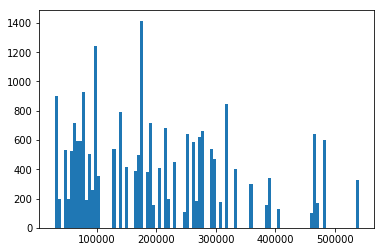

In [0]:
#Histogram of Loan Status 0 by Loan Amounts
plt.hist(eda_df.loc[eda_df['status'] == 0,'loan_amount'],bins = 100)

(array([3454.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 5333.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 4569.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 4510.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4894.]),
 array([12.  , 12.48, 12.96, 13.44, 13.92, 14.4 , 14.88, 15.36, 15.84,
        16.32, 16.8 , 17.28, 17.76, 18.24, 18.72, 19.2 , 19.68, 20.16,
        20.64, 21.12, 21.6 , 22.08, 22.56, 23.04, 23.52, 24.

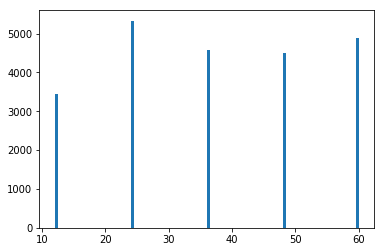

In [0]:
#Histogram of Loan Status 0 by Duration
plt.hist(eda_df.loc[eda_df['status'] == 0,'duration'],bins = 100)

(array([2016., 2663., 1261., 2694.,  716., 1612., 1019., 2504., 1109.,
        2474., 4785., 2372., 4416., 1057., 2866., 3013., 4789., 4546.,
        5150., 2059., 1713., 1479., 3158., 5164., 2111., 4832., 1713.,
        1517., 4844., 6682., 5464., 5565., 2890., 2779., 4903., 3633.,
        3206., 3918., 1649., 4128., 3401., 1809., 4631., 3497., 5575.,
        1126., 2951., 3279.,  424., 2231., 2098., 3069., 3387., 1179.,
        2517., 3021., 1220., 1450., 3243., 2333., 2001., 3439., 2339.,
        3798., 3412., 1141., 3757.,  316., 3104., 2296., 1215., 1388.,
        3857., 2622.,  748., 1044., 2277., 1124., 1699., 1589., 2618.,
        2109.,  901.,  886.,  384.,  128.,  548., 1413.,  228.,  384.,
         690.,  129.,    0.,  598.,    0.,  400.,    0.,  981.,  612.,
         542.]),
 array([ 304.  ,  400.06,  496.12,  592.18,  688.24,  784.3 ,  880.36,
         976.42, 1072.48, 1168.54, 1264.6 , 1360.66, 1456.72, 1552.78,
        1648.84, 1744.9 , 1840.96, 1937.02, 2033.08, 2129.14

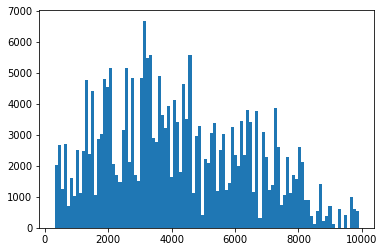

In [0]:
#Histogram of Loan Accounts by Payments
plt.hist(eda_df['payments'],bins = 100)

(array([31828.,  1588.,  1167.,  2363.,     0.,  2950.,  2017.,  1866.,
            0.,   817.,  2924.,  2078.,     0.,  4556.,  3871.,  2927.,
            0.,  2373.,  2512.,  3145.,     0.,  1447.,   745.,  5562.,
            0.,  2288.,  1809.,   500.,  2213.,     0.,  3523.,   936.,
         2241.,     0.,  2652.,  1994.,  2510.,     0.,   929.,  4243.,
         1909.,     0.,   860.,  2383.,   222.,     0.,  1510.,  2816.,
         5024.,     0.,  2201.,  2617.,   823.,  1978.,     0.,  1633.,
         2393.,  2519.,     0.,  1782.,  2726.,  2873.,     0.,  1494.,
         3580.,  2018.,     0.,  4864.,  1918.,  7422.,     0.,  3766.,
         1784.,  1704.,     0.,  1513.,  2147.,  4114.,  1937.,     0.,
         3748.,  2268.,  7174.,     0.,  1906.,  4265.,  1594.,     0.,
         5672.,  1867.,  6597.,     0.,  1380.,  4700.,  1868.,     0.,
         7673.,  1721.,  1056.,  3034.]),
 array([ 1.  ,  1.76,  2.52,  3.28,  4.04,  4.8 ,  5.56,  6.32,  7.08,
         7.84,  8.6 ,  

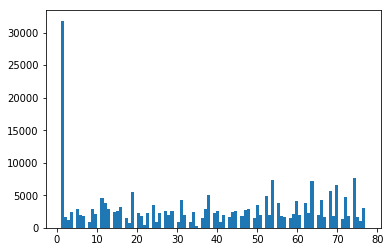

In [0]:
#Histogram of Loan Accoutns by District
plt.hist(eda_df['district_id'],bins = 100)

In [0]:
del eda_df['Unnamed: 0']

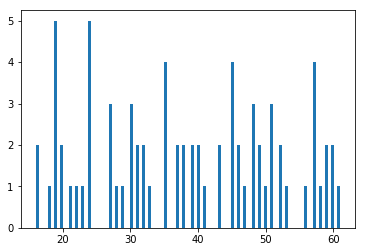

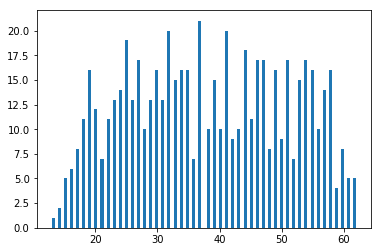

In [0]:
plt.hist(features.loc[features['status2'] == 0,'LoanAge'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'LoanAge'],bins = 100)
plt.show()

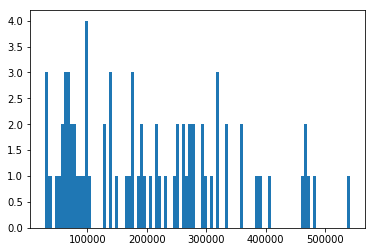

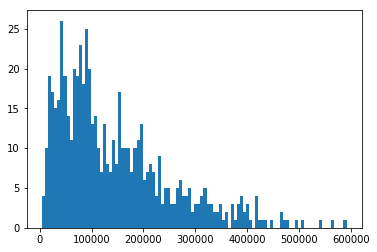

In [0]:
plt.hist(features.loc[features['status2'] == 0,'loan_amount'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'loan_amount'],bins = 100)
plt.show()

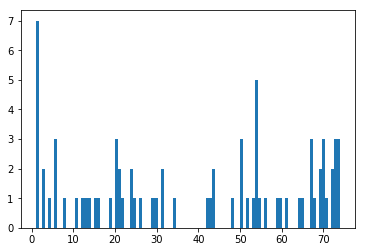

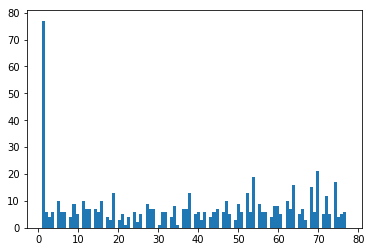

In [0]:
plt.hist(features.loc[features['status2'] == 0,'district_id'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'district_id'],bins = 100)
plt.show()

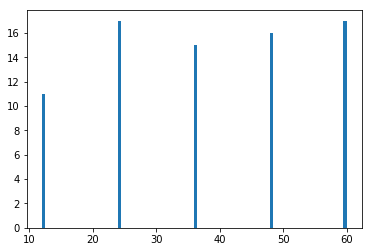

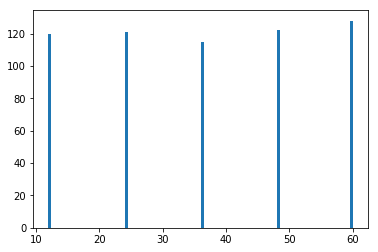

In [0]:
plt.hist(features.loc[features['status2'] == 0,'duration'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'duration'],bins = 100)
plt.show()

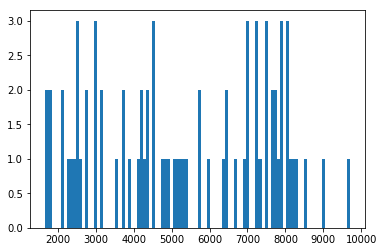

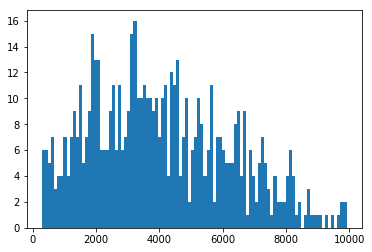

In [0]:
plt.hist(features.loc[features['status2'] == 0,'payments'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'payments'],bins = 100)
plt.show()

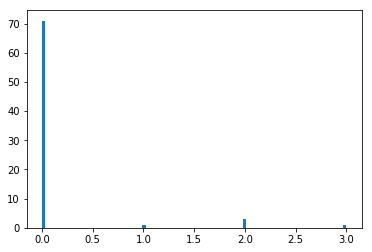

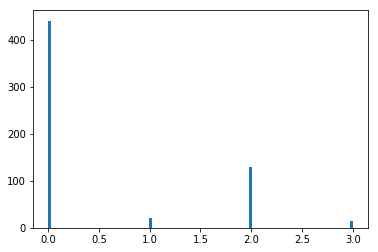

In [0]:
plt.hist(features.loc[features['status2'] == 0,'card_type'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'card_type'],bins = 100)
plt.show()

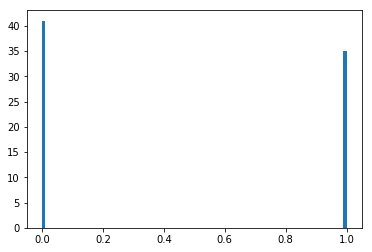

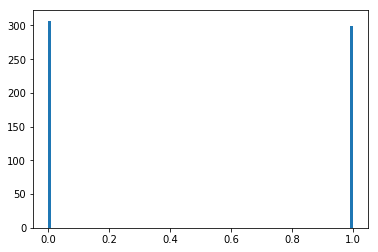

In [0]:
plt.hist(features.loc[features['status2'] == 0,'gender'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'gender'],bins = 100)
plt.show()

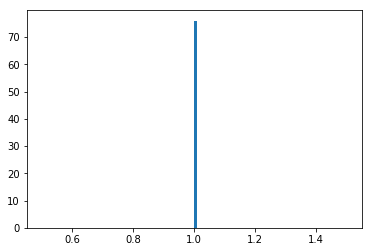

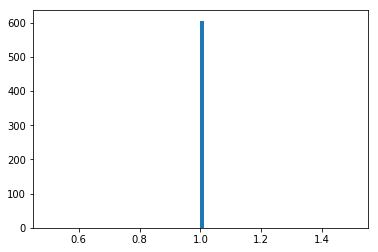

In [0]:
plt.hist(features.loc[features['status2'] == 0,'disp_type'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'disp_type'],bins = 100)
plt.show()

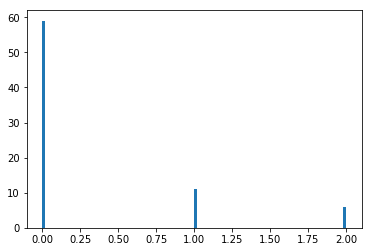

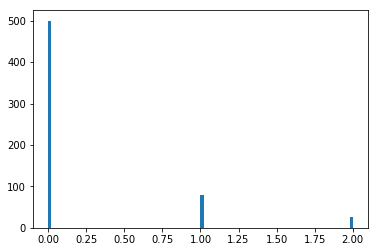

In [0]:
plt.hist(features.loc[features['status2'] == 0,'frequency'],bins = 100)
plt.show()
plt.hist(features.loc[features['status2'] == 1,'frequency'],bins = 100)
plt.show()

In [0]:
eda_df['trans_date'] = pd.to_datetime(eda_df['trans_date'],exact = False)

In [0]:
loan_df = eda_df[eda_df['k_symbol'] == 'loan']

In [0]:
loan_df = loan_df[loan_df['disp_type'] == 1]

In [0]:
del loan_df['Unnamed: 0']

In [0]:
loan_df.reset_index(inplace = True)

In [0]:
loan_df.sort_values(['loan_id','trans_date'])

,index,trans_id,trans_date,type,operation,trans_amount,balance,k_symbol,loan_id,loan_date,loan_amount,duration,payments,status,account_account_id,frequency,account_date,disp_disp_id,disp_type,card_id,card_type,issued,client_client_id,gender,birth_date,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,LoanAge
0,77,361,1994-01-12,withdrawal,toabank,3373,35338,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
1,78,362,1994-02-12,withdrawal,toabank,3373,29636,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
2,79,363,1994-03-12,withdrawal,toabank,3373,35827,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
3,80,364,1994-04-12,withdrawal,toabank,3373,40639,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
4,81,365,1994-05-12,withdrawal,toabank,3373,42772,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
5,82,366,1994-06-12,withdrawal,toabank,3373,40009,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
6,83,367,1994-07-12,withdrawal,toabank,3373,35317,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
7,84,368,1994-08-12,withdrawal,toabank,3373,40522,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
8,85,369,1994-09-12,withdrawal,toabank,3373,42447,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49
9,86,370,1994-10-12,withdrawal,toabank,3373,35328,loan,4959,1994-01-05,80952,24,3373.0,1,2,MONTHLY,1993-02-26,2,1,NaN,NaN,NaN,2,1,1945-02-04,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,49


In [0]:
owed_df = loan_df[['loan_id','loan_amount','trans_amount']].groupby(['loan_id']).sum()

In [0]:
#creating column to showed amount still owed by account
owed_df['stillowed'] = owed_df['loan_amount'] - owed_df['trans_amount']

In [0]:
transinterval = []
for x in range(len(loan_df)):
  
  if x == 0:
    #if on first line, there is no time to compare to so assume idle
    transinterval.append(0)
  elif loan_df.loc[x-1,'loan_id'] == loan_df.loc[x,'loan_id']:
    transinterval.append((loan_df.loc[x,'trans_date'] - loan_df.loc[x-1,'trans_date']).days)
    #same thing but further in the code for when it's the first data point of another car
    
  else:
    #time diff calculations
    transinterval.append(0)

In [0]:
loan_df['daysdiff'] = transinterval

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:

for x in range(len(loan_df)):
  
  if x == 0:
    #if on first line, there is no time to compare to so assume idle
    loan_df.loc[x,'daysdiff'] = 0
  elif loan_df.loc[x-1,'loan_id'] != loan_df.loc[x,'loan_id']:
    #same thing but further in the code for when it's the first data point of another car
    loan_df.loc[x,'daysdiff'] = 0
  else:
    #time diff calculations
    d1 = loan_df.loc[x,'trans_date']
    d2 = loan_df.loc[x-1,'trans_date']
    loan_df.loc[x,'daysdiff'] = d1 - d2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


KeyboardInterrupt: ignored

In [0]:
loan_df.loc[loan_df['status'] == 0,'daysdiff'].value_counts()

31     771
30     482
0       76
28      74
61      40
29      24
62      17
59      10
92       9
91       7
90       7
120      5
153      4
122      3
123      3
151      3
121      1
213      1
89       1
150      1
181      1
182      1
184      1
214      1
Name: daysdiff, dtype: int64

##Calculating the Total Amount Owed

In [0]:
#sum of total loan amounts given out
features['loan_amount'].sum()

103261740.0

In [0]:
#sum of total amounts given back
loan_df

In [0]:
loan_df[loan_df['status'] == 0]['trans_amount'].sum()

55253001

In [0]:

loan_df[loan_df['status'] == 0]['trans_amount'].sum()

7758935

In [0]:
features[features['status'] == 0]['loan_amount'].sum()

15580152.0

In [0]:
#amount still owed from bad loans is $7,821,217.00
15580152.0 - 7758935

7821217.0

In [0]:
#Total amount still owed from loans is $48,008,739.00
103261740.0 - 55253001

48008739.0

In [0]:
features[features['status'] == 1]['loan_amount'].sum()

87681588.0

In [0]:
loan_df[loan_df['status'] == 1]['trans_amount'].sum()

47494066

In [0]:
#amount still owed from good loans is $40,187,522.00
87681588.0 - 47494066

40187522.0

In [0]:
loan_df.isna().sum()

index                     0
trans_id                  0
trans_date                0
type                      0
operation                 0
trans_amount              0
balance                   0
k_symbol                  0
loan_id                   0
loan_date                 0
loan_amount               0
duration                  0
payments                  0
status                    0
account_account_id        0
frequency                 0
account_date              0
disp_disp_id              0
disp_type                 0
card_id               10293
card_type             10293
issued                10293
client_client_id          0
gender                    0
birth_date                0
district_id               0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
A11                 

#Modeling Time

train test split

upsample defaults

run model

optimize parameters

feature selection


In [0]:
featuresdisp.columns

Index([      'loan_amount',          'duration',          'payments',
               'frequency',         'disp_type',         'card_type',
                  'gender',           'LoanAge',       'district_id',
                 'status2',  ('balance', 'min'),  ('balance', 'max'),
       ('balance', 'mean')],
      dtype='object')

In [0]:
#assigning order to columns
featuresdisp.columns = ['loan_amount',          'duration',          'payments',
               'frequency',         'disp_type',         'card_type',
                  'gender',           'LoanAge',       'district_id',
                 'status2',  'minbalance',  'maxbalance',
       'meanbalance']

In [0]:
#creating input
x = featuresdisp[['loan_amount',          'duration',          'payments',
               'frequency',         'card_type','disp_type',
                  'gender',           'LoanAge',       'district_id',
                   'minbalance',  'maxbalance',
       'meanbalance']]

In [0]:
#target variable
y = featuresdisp['status2']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
sm = SMOTE(random_state=42)

In [0]:
#balancing the data
from sklearn.utils import resample
# concatenate our training data back together
X = pd.concat([x_train_scale, y_train], axis=1)

# separate minority and majority classes
default = X[X.status2==0]
okay = X[X.status2==1]

# upsample minority
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(okay), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([okay, default_upsampled])

# check new class counts
upsampled.status2.value_counts()

TypeError: ignored

In [0]:
x_train = upsampled.drop('status2', axis=1)
y_train = upsampled.status2

In [0]:
from sklearn.compose import ColumnTransformer

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [0]:
std_scaler = StandardScaler()

In [0]:
x_train.columns

Index(['loan_amount', 'duration', 'payments', 'frequency', 'card_type',
       'gender', 'LoanAge', 'district_id', 'minbalance', 'maxbalance',
       'meanbalance'],
      dtype='object')

In [0]:
numerical_columns = [ 'loan_amount', 'duration', 'payments', 'frequency', 'card_type',
        'LoanAge', 'district_id', 'minbalance', 'maxbalance',
       'meanbalance']

In [0]:
#Transform Scaling the numerical columns
transformer = ColumnTransformer([('scaler',std_scaler,numerical_columns)],remainder = 'passthrough')
transformer.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['loan_amount', 'duration', 'payments',
                                  'frequency', 'card_type', 'LoanAge',
                                  'district_id', 'minbalance', 'maxbalance',
                                  'meanbalance'])],
                  verbose=False)

In [0]:
x_train_scale = transformer.transform(x_train)
x_test_scale = transformer.transform(x_test)

In [0]:
x_scale = transformer.transform(x)

In [0]:
#fitting logistic regression model
log_model = LogisticRegression(max_iter = 1000,penalty = 'l1')
log_model.fit(x_train_scale,y_train)
y_pred_log = log_model.predict(x_test_scale)
precision_score(y_test,y_pred_log)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9791666666666666

In [0]:
y_pred_log_train = log_model.predict(x_train_scale)

In [0]:
recall_score(y_train,y_pred_log_train)

0.756701030927835

In [0]:
accuracy_score(y_test,y_pred_log)

0.7883211678832117

In [0]:
recall_score(y_test,y_pred_log)

0.7768595041322314

In [0]:
{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__solver': 'liblinear'}



In [0]:
ratio_list = []
for ratio in np.arange(0,1,0.1):
  log_model = LogisticRegression(l1_ratio = ratio,penalty = 'elasticnet',solver = 'saga')
  log_model.fit(x_train_scale,y_train)
  y_pred_log = log_model.predict(x_test_scale)
  score = precision_score(y_test,y_pred_log)
  ratio_list.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_

In [0]:
ratio_list

[0.968,
 0.968,
 0.968,
 0.9758064516129032,
 0.9758064516129032,
 0.9758064516129032,
 0.9758064516129032,
 0.9758064516129032,
 0.9758064516129032,
 0.9758064516129032]

In [0]:
y_pred_log_train = log_model.predict(x_train_scale)

In [0]:
y_pred_log_x = log_model.predict(x_scale)

In [0]:
precision_score(y,y_pred_log_x)

0.9901960784313726

In [0]:
confusion_matrix(y,y_pred_log_x)

array([[ 70,   6],
       [  0, 606]])

In [0]:
features['pred_status'] = y_pred_log_x

In [0]:
features.loc[features['pred_status'] == 0,'loan_amount'].sum()

14734152.0

In [0]:
log_model.predict_proba(x_scale)

array([[1.24444471e-03, 9.98755555e-01],
       [1.00000000e+00, 3.04627391e-14],
       [1.86770463e-03, 9.98132295e-01],
       ...,
       [3.44558628e-02, 9.65544137e-01],
       [2.89741156e-03, 9.97102588e-01],
       [2.77899621e-03, 9.97221004e-01]])

###metrics

In [0]:
recall_score(y,y_pred_log_x)

1.0

In [0]:
precision_score(y_train,y_pred_log_train)

0.9918200408997955

In [0]:
precision_score(y_test,y_pred_log)

0.9758064516129032

In [0]:
accuracy_score(y_test,y_pred_log)

0.9927007299270073

In [0]:
y_pred_log.sum()

118.0

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix(y_test,y_pred_log)

array([[14,  2],
       [27, 94]])

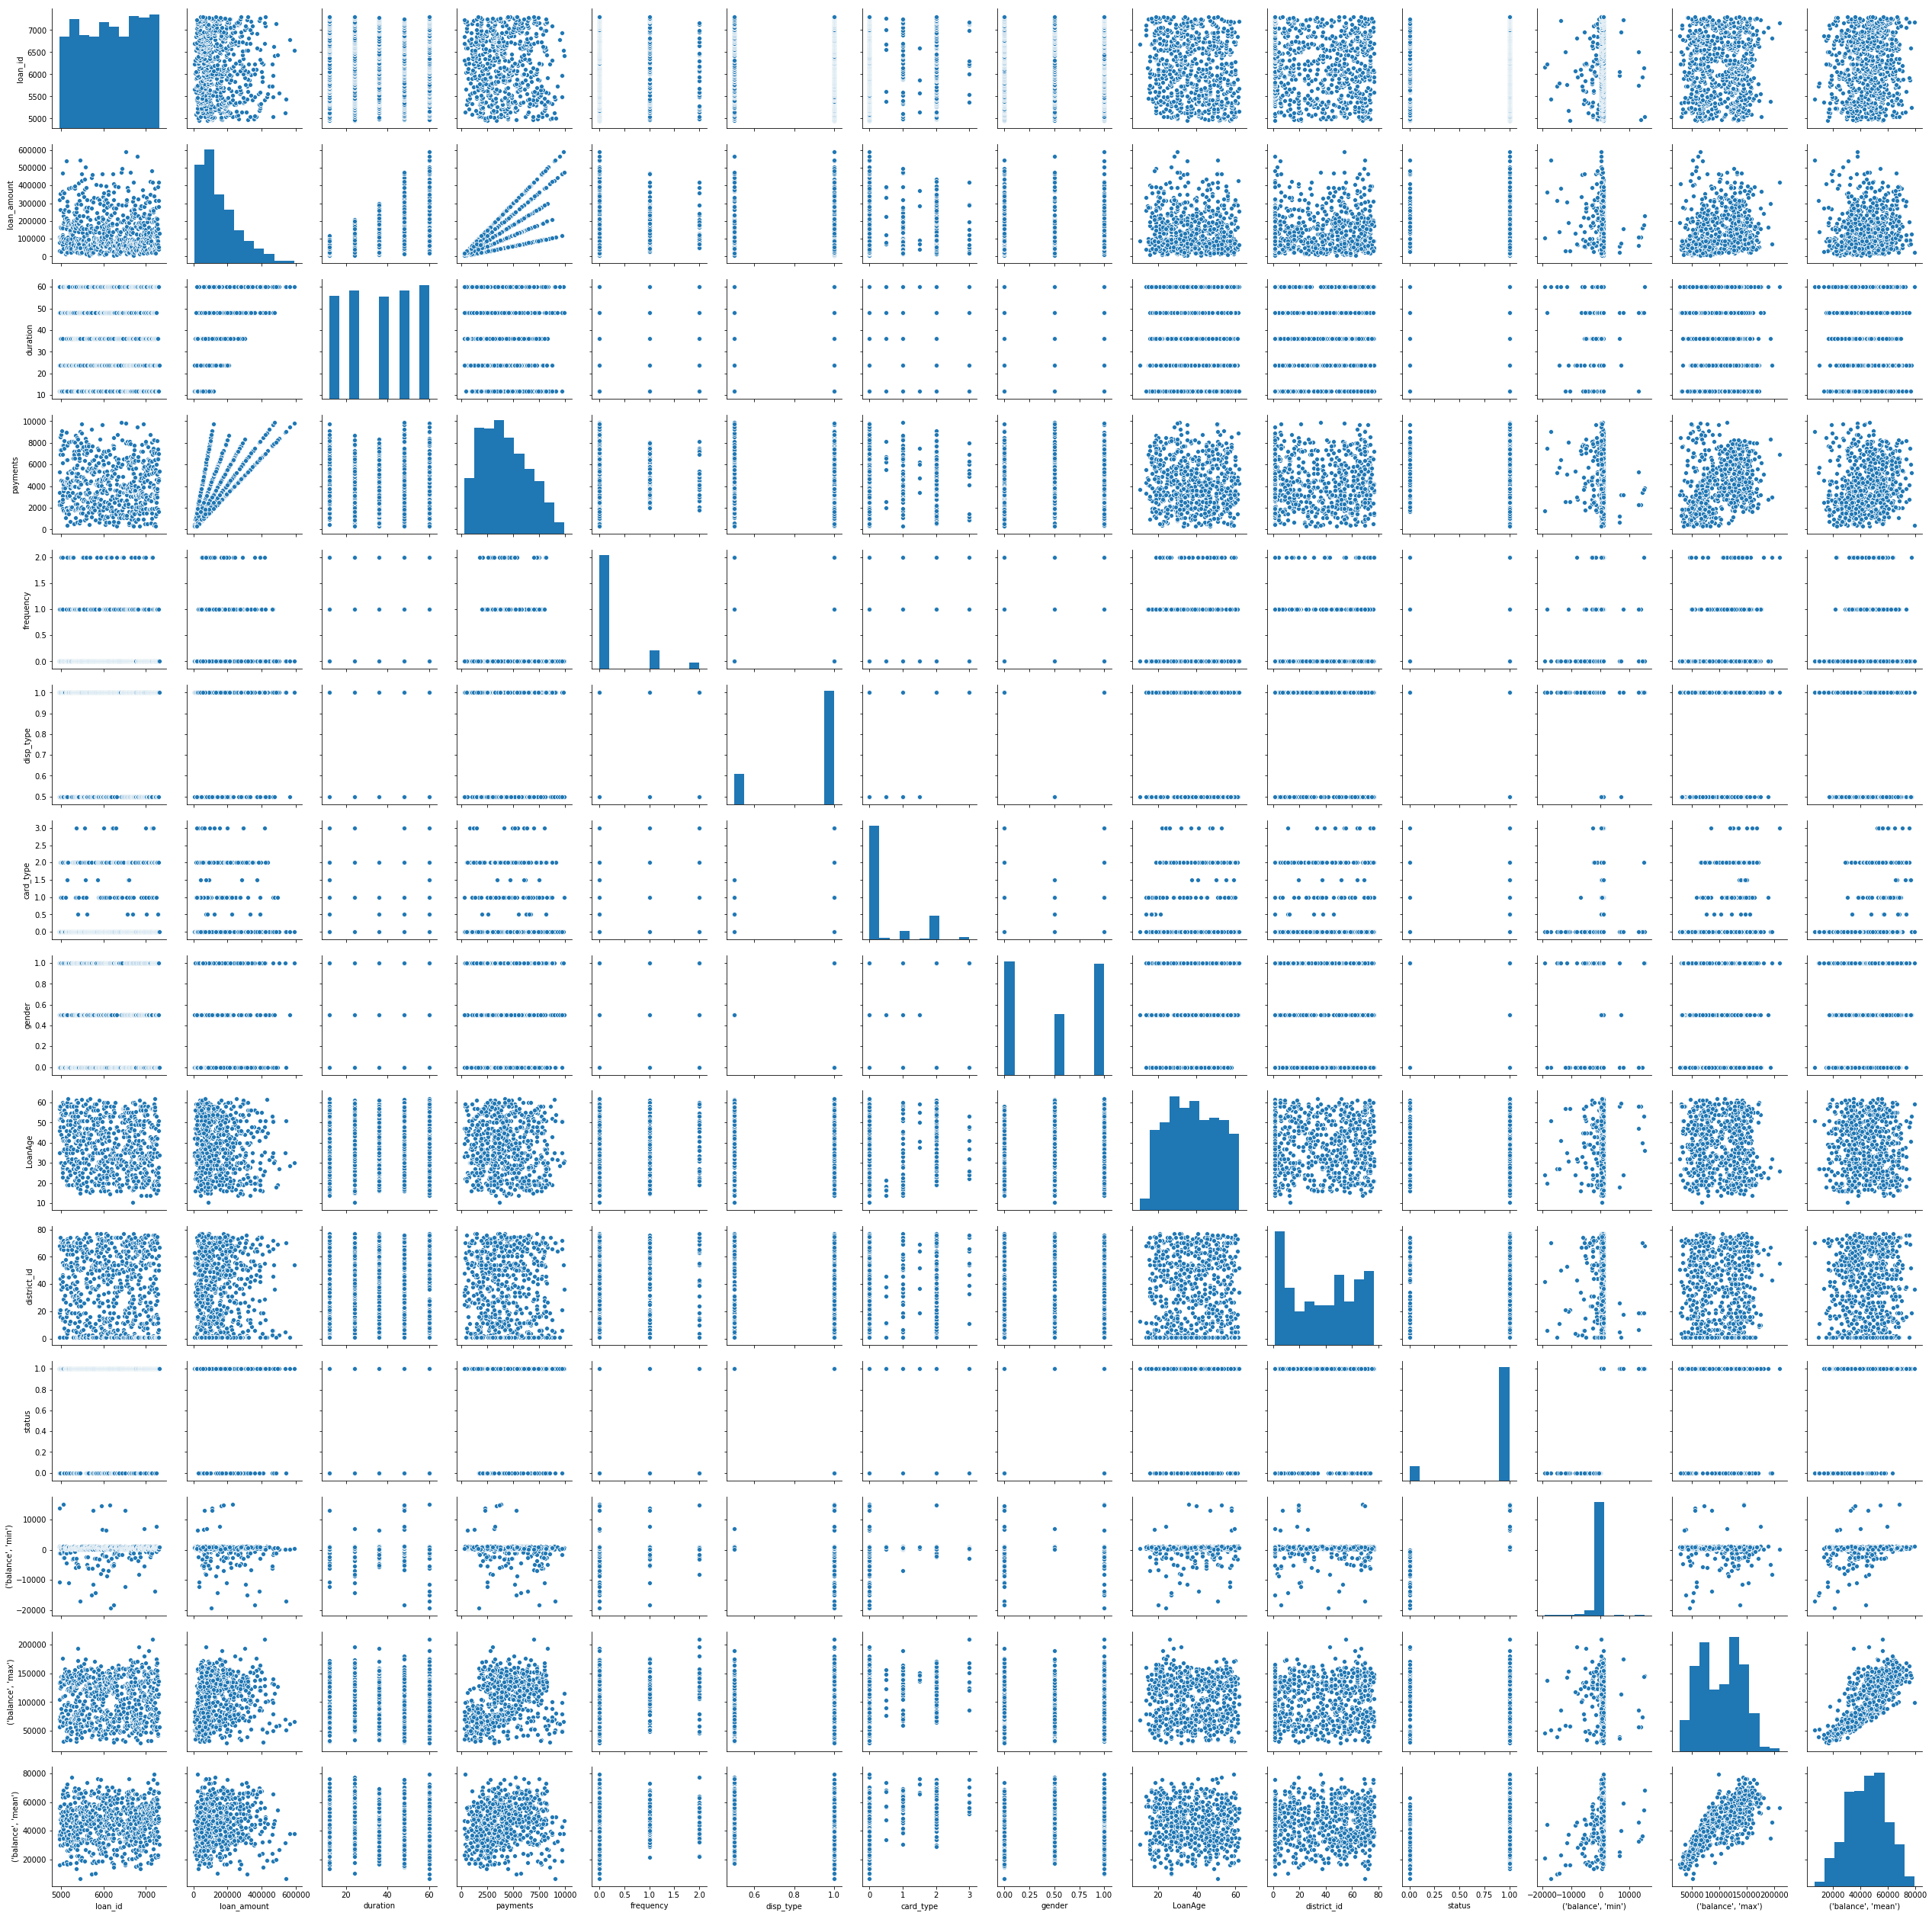

In [0]:
#ploting every dimension in combination with another
sns.pairplot(features)

In [0]:
x.columns

Index(['loan_amount', 'duration', 'payments', 'frequency', 'card_type',
       'LoanAge', 'district_id', '('balance', 'min')', '('balance', 'max')',
       '('balance', 'mean')', 'gender', 'disp_type'],
      dtype='object')

In [0]:
log_model.coef_

array([[-0.2651885 ,  0.37318265, -0.25007006,  0.2775048 ,  0.63690884,
        -0.15633175, -0.07938383,  8.78318229, -2.03566452,  2.30818754,
        -0.80644867, -2.19734409]])

In [0]:
featuresbl.corr()

pandas.core.frame.DataFrame

In [0]:
series = featuresdisp.corr()

In [0]:
del series['']

In [0]:
core = series['status2'].sort_values(ascending = False)

In [0]:
core.index

Index(['status2', 'y_pred', 'minbalance', 'meanbalance', 'card_type', 'gender',
       'LoanAge', 'maxbalance', 'district_id', 'duration', 'frequency',
       'trans_amount', 'stillowed', 'loan_amount', 'payments', 'disp_type'],
      dtype='object')

In [0]:
core = core.drop(labels = ['status2'])

Text(0.5, 1.0, 'Correlation Values to Good Loans')

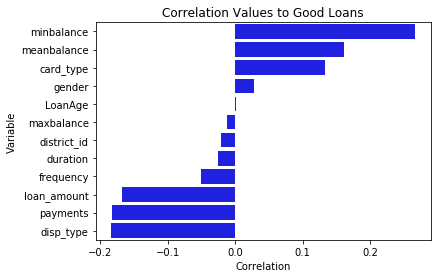

In [0]:

sns.barplot(y = core.index,x = core.sort_values(ascending = False),color = 'blue')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.title('Correlation Values to Good Loans')

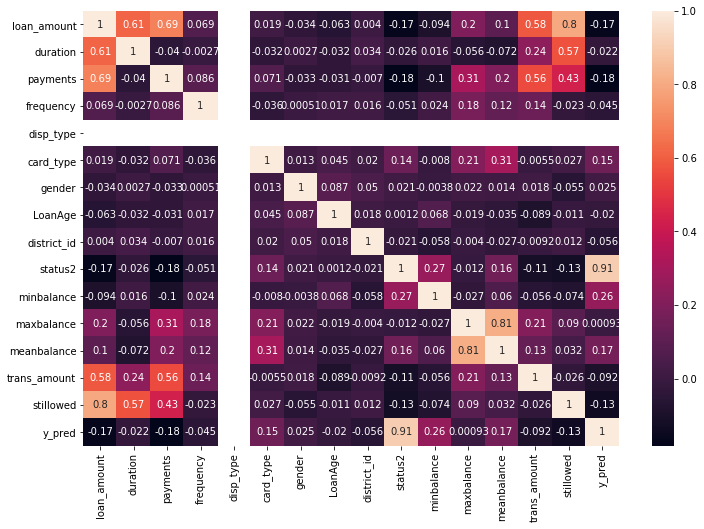

In [0]:
plt.figure(figsize = (12,8))
sns.heatmap(featuresbl.corr(),annot = True)

In [0]:
weights = pd.Series(log_model.coef_[0],
 index=x.columns.values)
weights.sort_values(ascending = False)

district_id    3.575014
maxbalance     1.137573
card_type      0.938259
duration       0.245570
LoanAge        0.160745
frequency     -0.088454
meanbalance   -0.204812
gender        -0.221549
payments      -0.349272
loan_amount   -0.403692
minbalance    -0.701933
dtype: float64

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
#Tuning Hyperparamets to Optimize model
tuned_parameters = [{'model__penalty': ['l1'], 'model__solver': ['liblinear', 'saga'],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]},
                    {'model__penalty': ['l2'], 'model__solver': ['liblinear','newton-cg', 'lbfgs', 'sag','saga'],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]},
                    {'model__penalty': ['elasticnet'], 'model__solver': ['saga'],'model__l1_ratio' : [0, 0.25, 0.5, 0.75, 1],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]},
                    {'model__penalty': ['none'], 'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                     'model__C': [10e-2, 10e-1,1, 10, 100, 1000], 'model__max_iter': [1000]}]

scores = ['precision', 'recall','f1']

score_list = []


for score in scores:
    print("\n\n# Tuning hyper-parameters for %s\n" % score)
    print()
    log_model = LogisticRegression()
    my_pipe = Pipeline([('scaler', std_scaler), ('model', log_model)])
    
    clf = GridSearchCV(my_pipe,tuned_parameters, cv=5, scoring='%s_macro' % score)
    clf.fit(x_train,y_train)
    print('\n\n')
    print("Best parameters set found on development set:\n")
    print()
    print(clf.best_params_)
    score_list.append((score,clf.best_score_, clf.best_params_))



# Tuning hyper-parameters for precision




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r




Best parameters set found on development set:


{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


# Tuning hyper-parameters for recall




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r




Best parameters set found on development set:


{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


# Tuning hyper-parameters for f1




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1510: UserWarning: Setting penalty='none' will ignore the C and l1_r




Best parameters set found on development set:


{'model__C': 1.0, 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


Text(0.5, 1.0, 'F1 Score from Logistic Regression')

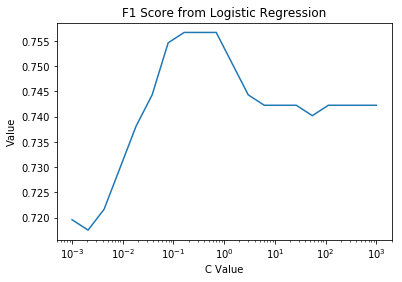

In [0]:
invAlphas = np.logspace(-3,3,20)
model_scores = {}
for metric,score, param in score_list:
  scores_list = []
  for c_num in invAlphas:
    log_model = LogisticRegression(C=c_num, solver=param['model__solver'], 
                                   penalty=param['model__penalty'], max_iter=param['model__max_iter'],
                                   l1_ratio= param['model__l1_ratio'] if 'model__l1_ratio' in param else None )
    my_pipe = Pipeline([('scaler', std_scaler), ('model', log_model)])
    # put into cross validation
    score = cross_val_score(my_pipe,x_train, y_train, cv=5, scoring=metric)
    #Append to list
    scores_list.append(score.mean())
  model_scores[metric] = scores_list

plt.plot(np.logspace(-3,3,20),model_scores['recall'])
plt.xscale('log')
plt.ylabel('Value')
plt.xlabel('C Value')
plt.title('F1 Score from Logistic Regression')

##Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
#fitting the model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

###metrics

In [0]:
precision_score(y_test,y_pred_dt)

0.9487179487179487

In [0]:
accuracy_score(y_test,y_pred_dt)

0.8832116788321168

In [0]:
confusion_matrix(y_test,y_pred_dt)

array([[ 10,   6],
       [ 10, 111]])

In [0]:
recall_score(y_test,y_pred_dt)

0.9173553719008265

In [0]:
y_pred_dt_train = dt_model.predict(x_train)

In [0]:
confusion_matrix(y_train,y_pred_dt_train)

array([[ 60,   0],
       [  0, 485]])

In [0]:
dt_model.feature_importances_

array([0.08908777, 0.        , 0.14767468, 0.00292887, 0.02889543,
       0.        , 0.02662094, 0.02287508, 0.12636745, 0.34806465,
       0.0889579 , 0.11852722])

In [0]:
weights = pd.Series(dt_model.feature_importances_,
 index=x.columns.values)
weights = weights.sort_values(ascending = False)

Text(0, 0.5, 'Variable')

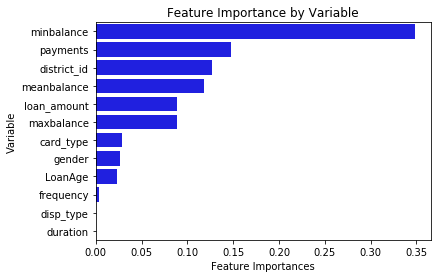

In [0]:
sns.barplot(y= weights.index,x = weights.values,color = 'blue')
plt.xlabel('Feature Importances')
plt.title('Feature Importance by Variable')
plt.ylabel('Variable')

Text(0.5, 0, 'Feature Importances')

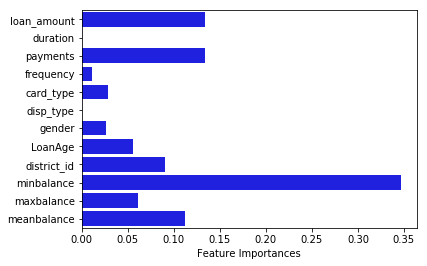

In [0]:
sns.barplot(color = 'blue',y = x.columns.values,x = dt_model.feature_importances_)
plt.xlabel('Feature Importances')

###Find out amount saved if applied model to all loans


In [0]:
y_pred_dt_full = dt_model.predict(x)

In [0]:
precision_score(y,y_pred_dt_full)

0.9900332225913622

In [0]:
accuracy_score(y,y_pred_dt_full)

0.9765395894428153

In [0]:
recall_score(y,y_pred_dt_full)

0.9834983498349835

In [0]:
confusion_matrix(y,y_pred_dt_full)

array([[ 70,   6],
       [ 10, 596]])

In [0]:
featuresbl = featuresbl.merge(owed_df['trans_amount'],left_on = 'loan_id',right_on = 'loan_id')

In [0]:
featuresbl['stillowed'] = featuresbl['loan_amount'] - featuresbl['trans_amount']

In [0]:
featuresbl['y_pred'] = y_pred_dt_full

In [0]:
featuresbl['status2'].dtype

dtype('float64')

##this is the amount they could have saved by running this model

In [0]:
#amount recovered from model
featuresbl[(featuresbl['status2'] == 0) & (featuresbl['y_pred'] == 0)]['stillowed'].sum()

7448063

total owed from bad loans7821217.0

In [0]:
7821217.0 - 7448063

373154.0

In [0]:
loanoutstanding_list = [7821217,373154.0]

In [0]:
name_list = ['Current Outstanding','Outstanding with Model']

Text(0.5, 1.0, 'Reduction in Loan Amounts Owed for Bad Loans')

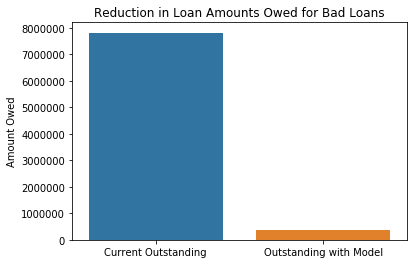

In [0]:
#bargraph
sns.barplot(y = loanoutstanding_list,x = name_list)
plt.ylabel('Amount Owed')
plt.title('Reduction in Loan Amounts Owed for Bad Loans')


In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pre_rf = rf.predict(x_test)

In [0]:
precision_score(y_test,y_pre_rf)

0.9918032786885246